# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(filename, header = 0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [5]:
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [8]:
#identifying missingness
nan_count = np.sum(df.isnull(), axis = 0) #shows num of total missing values
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [9]:
mean_age = df['age'].mean()
mean_hours_per_week = df['hours-per-week'].mean()
df['age'].fillna(mean_age, inplace = True)
df['hours-per-week'].fillna(mean_hours_per_week, inplace = True)

In [10]:
np.sum(df.isnull(), axis = 0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income_binary        0
dtype: int64

In [11]:
#one hot encode categorical columns 
to_encode = [
 'education',
 'marital-status',
 'relationship',
 'race',
 'sex_selfID',
 'income_binary'] #note: workclass, native-country, and occupation are categorical columns but they contain missing values

In [12]:
encoder = OneHotEncoder(handle_unknown = "error",sparse = False)
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))
df_enc.columns = encoder.get_feature_names(to_encode)
df.drop(columns = to_encode, inplace = True)
df = df.join(df_enc)
df.head()

,age,workclass,fnlwgt,education-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,education_10th,...,relationship_Wife,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female,income_binary_<=50K,income_binary_>50K
0,39.0,State-gov,77516,13,Adm-clerical,2174,0,40.0,United-States,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,50.0,Self-emp-not-inc,83311,13,Exec-managerial,0,0,13.0,United-States,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,38.0,Private,215646,9,Handlers-cleaners,0,0,40.0,United-States,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,53.0,Private,234721,7,Handlers-cleaners,0,0,40.0,United-States,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,28.0,Private,338409,13,Prof-specialty,0,0,40.0,Cuba,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [13]:
# YOUR CODE HERE
# Creating a new binary label 'homeowner' based on income, age, workclass
df['homeowner'] = np.where((df['income_binary_>50K'] == 1) |
                           (df['workclass'].isin(['Private', 'Self-emp-not-inc', 'Self-emp-inc'])) &
                           (df['age'] > 29), 
                           'Yes', 'No')
df.head()

,age,workclass,fnlwgt,education-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,education_10th,...,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female,income_binary_<=50K,income_binary_>50K,homeowner
0,39.0,State-gov,77516,13,Adm-clerical,2174,0,40.0,United-States,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,No
1,50.0,Self-emp-not-inc,83311,13,Exec-managerial,0,0,13.0,United-States,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Yes
2,38.0,Private,215646,9,Handlers-cleaners,0,0,40.0,United-States,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Yes
3,53.0,Private,234721,7,Handlers-cleaners,0,0,40.0,United-States,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Yes
4,28.0,Private,338409,13,Prof-specialty,0,0,40.0,Cuba,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,No


In [14]:
# split into training and test sets
feature_list = list(df.select_dtypes(include=["float64"]).columns)
y = df['homeowner']
X = df[feature_list]


# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
# Step 1: Choose and create a model object
model_default = LogisticRegression(max_iter=1000)

# Step 2: Fit the model to the training data
model_default.fit(X_train, y_train)

proba_predictions_default = model_default.predict_proba(X_test)
l_loss = log_loss(y_test, proba_predictions_default)
print('Log loss: ' + str(l_loss))

class_label_predictions_default = model_default.predict(X_test)
print('Class labels: ' + str(class_label_predictions_default[0:5]))

acc_score = accuracy_score(y_test, class_label_predictions_default)
print('Accuracy: ' + str(acc_score))

Log loss: 0.375437624836591
Class labels: ['No' 'Yes' 'Yes' 'No' 'Yes']
Accuracy: 0.8413941348073085


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
matrix = pd.DataFrame(confusion_matrix(y_test, class_label_predictions_default, labels = ['Yes', 'No']))
matrix

,0,1
0,3595,478
1,555,1885


In [17]:
from sklearn.svm import l1_min_c

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C = list(cs))
param_grid

{'C': [4.7262116809278346e-06,
  1.3841394150617606e-05,
  4.0536523746041795e-05,
  0.0001187170699376471,
  0.0003476801016011244,
  0.001018231439782483,
  0.0029820379716494956,
  0.008733329297177364,
  0.02557681737726083,
  0.07490540719232724,
  0.21937131363484932,
  0.6424606053113998,
  1.8815387597310669,
  5.510358261818099,
  16.137880772611346,
  47.262116809278346]}

In [18]:
from sklearn.model_selection import GridSearchCV
print('Running Grid Search...')

# 1. Create a LogisticRegression model object with the argument max_iter=1000. 
#    Save the model object to the variable 'model'
model = LogisticRegression(max_iter = 1000)

# 2. Run a grid search with 5-fold cross-validation and assign the output to the 
# object 'grid'.
grid = GridSearchCV(model, param_grid, cv=5)

# 3. Fit the model on the training data and assign the fitted model to the 
#    variable 'grid_search'
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [19]:
best_c= grid_search.best_params_['C']
best_c

4.7262116809278346e-06

In [20]:
# 1. Create the  model object below and assign to variable 'model_best'
model_best = LogisticRegression(C =best_c, max_iter=1000)
# 2. Fit the model to the training data below
model_best.fit(X_train, y_train)

LogisticRegression(C=4.7262116809278346e-06, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# 1. Make predictions on the test data using the predict_proba() method
proba_predictions_best = model_best.predict_proba(X_test)[:, 1].tolist()

# 2. Make predictions on the test data using the predict() method
class_label_predictions_best = model_best.predict(X_test)
c_matrix = confusion_matrix(y_test, class_label_predictions_best)
c_matrix

array([[1723,  717],
       [ 239, 3834]])

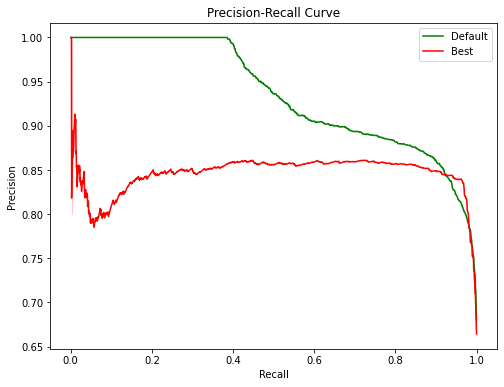

In [30]:
import numpy as np

# Convert proba_predictions_best to a NumPy array
proba_predictions_best_np = np.array(proba_predictions_best)

# Calculate precision, recall, and thresholds for the precision-recall curve
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test_encoded, proba_predictions_default[:, 1])
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test_encoded, proba_predictions_best_np)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=recall_default, y=precision_default, color='green', label='Default')
sns.lineplot(x=recall_best, y=precision_best, color='red', label='Best')

# Set the x-axis and y-axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Plot title and legend
plt.title('Precision-Recall Curve')
plt.legend()

# Show the plot
plt.show()


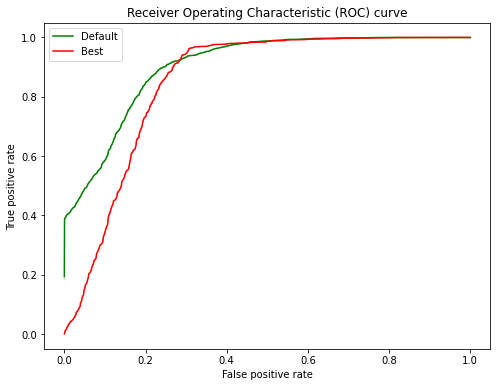

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Convert labels to binary format using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Calculate ROC curve and AUC for the default and best models
fpr_default, tpr_default, thresholds_default = roc_curve(y_test_encoded, proba_predictions_default[:, 1])
fpr_best, tpr_best, thresholds_best = roc_curve(y_test_encoded, proba_predictions_best)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_default, y=tpr_default, color='green', label='Default')
sns.lineplot(x=fpr_best, y=tpr_best, color='red', label='Best')

# Set the x-axis and y-axis labels
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# Plot title and legend
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend()

# Show the plot
plt.show()


In [35]:
auc_default = auc(fpr_best, tpr_best)
auc_best = auc(fpr_best, tpr_best)
print(auc_default)
print(auc_best)

0.8494700204867722
0.8494700204867722


Random Forest - Accuracy:  0.8909872562567174
Random Forest - Log Loss:  0.44204494041836145


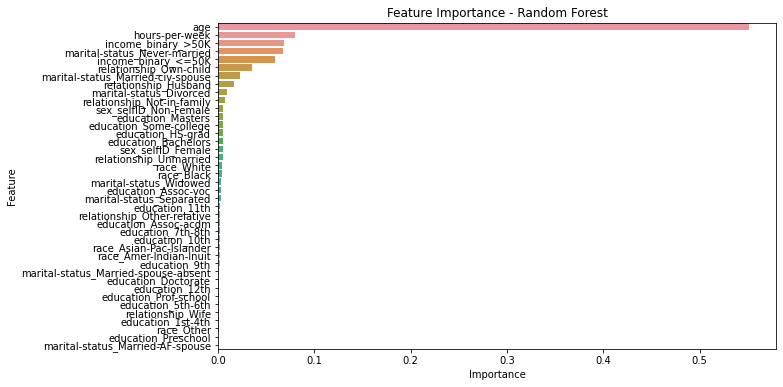

In [36]:
#random tree classifier model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_class_label_predictions = rf_model.predict(X_test)
rf_prob_predictions = rf_model.predict_proba(X_test)

rf_acc_score = accuracy_score(y_test, rf_class_label_predictions)
rf_log_loss = log_loss(y_test, rf_prob_predictions)

print('Random Forest - Accuracy: ', rf_acc_score)
print('Random Forest - Log Loss: ', rf_log_loss)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': feature_list, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
